In [1]:
import numpy as np
from numpy.linalg import inv, pinv, norm

def generate_linear_weight(input_size, hidden_layer_size_list, output_size, epsilon):
    nb_elements = 0
    previous_size = 0
    for next_size in hidden_layer_size_list:
        nb_elements += previous_size*next_size
        previous_size = next_size
    nb_elements += previous_size*output_size

    prob = 0.01

    sigma = np.sqrt ((epsilon*prob)/(7*nb_elements))
    print(f"sigma is {sigma}")

    weight_list = []
    previous_size = input_size

    zeros= 0
    for next_size in hidden_layer_size_list:
        weight_list.append(np.random.random(size = (previous_size, next_size))*sigma*zeros)
        previous_size = next_size
        zeros = (zeros or 1)
        # print(f"zeros is {zeros}")
    
    weight_list.append((np.random.random(size = (previous_size, next_size))*sigma).T[0].reshape((previous_size, 1)))

    return weight_list


class LinearModel():
    def __init__(self, input_size, hidden_layer_size_list, output_size, epsilon=1):
        self.input_size= input_size
        # Initialize the weights
        self.weight_list = generate_linear_weight(input_size, hidden_layer_size_list, output_size, epsilon) 

    def __call__(self, X):
        return self.forward(X)
    


    def step(self, X_train, y_train, lr=0.01):
        # Forward pass
        y_pred = self.forward(X_train)
        N = X_train.shape[0]

        # Compute gradient of loss w.r.t. output
        dA = (2 / N) * (y_pred - y_train)   # dL/dA_last

        # List to store gradients for each weight matrix
        grad_list = [None] * len(self.weight_list)

        # Backward pass: reverse order
        for i in reversed(range(len(self.weight_list))):
            W = self.weight_list[i]

            # a_{i-1} is either input X or previous partial output
            if i == 0:
                A_prev = self.lastX
            else:
                A_prev = self.partial[i-1]

            # Gradient wrt W_i:   dW = A_prev.T @ dA
            grad_W = A_prev.T @ dA
            grad_list[i] = grad_W

            # Backprop to previous layer: dA = dA @ W.T
            dA = dA @ W.T

        # Update parameters
        for i in range(len(self.weight_list)):
            self.weight_list[i] -= lr * grad_list[i]


    def get_w_prod(self):
        w_prod = self.weight_list[0]
        for i in range(1, len(self.weight_list)):
            w_prod = w_prod@self.weight_list[i]
        return w_prod
    
    def forward(self, X):
        if X.shape[1] != self.input_size:
            print("size of input do not match size of model")
            return
        
        self.lastX = X
        y = X

        self.partial = []
        for W in self.weight_list:
            y = y@W
            self.partial.append(y)
        return y



def generate_data(n, d, noise_variance = .1):
    """Generates random Gaussian data with noise."""
    X = np.random.normal(0, 1, (n, d))
    Xtest = np.random.normal(0, 1, (n, d))
    w_true = np.random.normal(0, 1, (d,1))
    noise = np.random.normal(0, 1, (n, 1))
    y = X @ w_true + noise_variance * noise
    noise2 = np.random.normal(0, 1, (n,1))
    ytest = Xtest @ w_true + noise_variance * noise2
    w_star = np.linalg.pinv(X.T @ X) @ X.T @ y
    return (X, y, Xtest, ytest, w_star, w_true)







In [3]:
    
np.random.seed(45)
n = 1
d = 2


# 2*2, 2 matrices, voir les vecteurs s'aligner, qu'est ce qu'il se passe pendant 


model = LinearModel(d, [ d, d], 1)
for weight in model.weight_list:
    print(np.linalg.svd(weight)[1][0])

(X, y, Xtest, ytest, w_star, w_true) =  generate_data(n, d, noise_variance=10)

col_Xt_proj_mat = X.T@pinv(X@X.T)@X
kern_X_proj_mat = np.eye(d) - col_Xt_proj_mat

best_error = (norm(y-X@w_star))

w_0 = model.get_w_prod()

test_error = []
val_col = []
val_ker = []
dif_w_star = []

test_error.append(norm(y-model(X)))
val_col.append(norm(col_Xt_proj_mat@w_0))
val_ker.append(norm(kern_X_proj_mat@w_0))
dif_w_star.append(norm(w_0-w_star))

nb_steps = 100000
for i in range(nb_steps):
    # print(model(X))
    # print(i)
    model.step(X, y, .001)
    w_0 = model.get_w_prod()


    if i%(nb_steps/100) == 0:
        test_error.append(norm(y-model(X)))
        val_col.append(norm(col_Xt_proj_mat@w_0))
        val_ker.append(norm(kern_X_proj_mat@w_0))
        dif_w_star.append(norm(w_0-w_star))
        print(np.log(test_error[-1]))

print ()
print(test_error[0])
print(test_error[-1])
print ()
for weight in model.weight_list:
    print(np.linalg.svd(weight)[1][0])




sigma is 0.01543033499620919
0.0
0.010288513447625547
0.013331776109965882
2.3211184384760113
2.321118436707417
2.321118434882106
2.3211184329402066
2.321118430815164
2.3211184284295303
2.321118425689574
2.321118422477997
2.3211184186437253
2.321118413987151
2.3211184082382004
2.3211184010229053
2.321118391811076
2.3211183798320247
2.3211183639345188
2.321118342345662
2.3211183122385775
2.321118268919871
2.3211182042151877
2.321118103040358
2.3211179355001472
2.3211176367184847
2.3211170480339156
2.3211157116042775
2.321111936669844
2.321096252013215
2.3209351995662595
-1.0914531149749411
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.130998503381104
-31.

[10.187061538526947, 10.187061538509026, 10.187061520492248, 10.18706150189769, 10.187061482115443, 10.187061460467499, 10.187061436164903, 10.1870614082528, 10.187061375536267, 10.18706133647631, 10.187061289039502, 10.187061230474587, 10.187061156971936, 10.187061063130468, 10.18706094109914, 10.18706077915028, 10.187060559223287, 10.187060252520599, 10.187059811230334, 10.187059152079875, 10.187058121405954, 10.187056414664232, 10.187053370959035, 10.187047373999679, 10.187033759736737, 10.186995304424808, 10.186835526154415, 10.185195043471614, 0.3357282872808458, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626980426e-14, 3.019806626

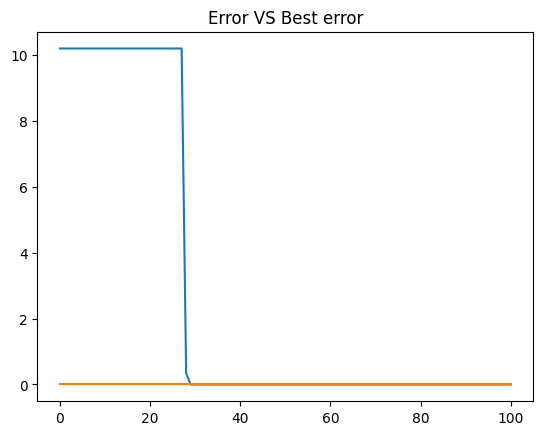

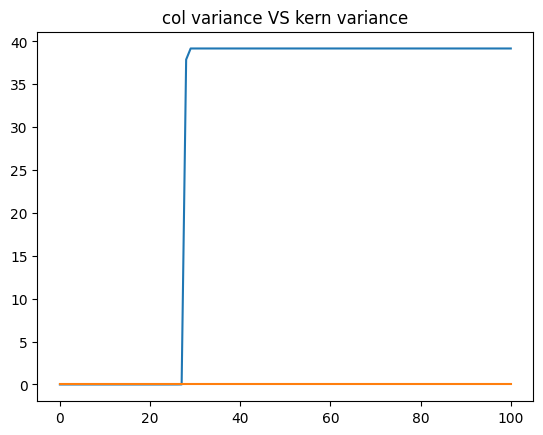

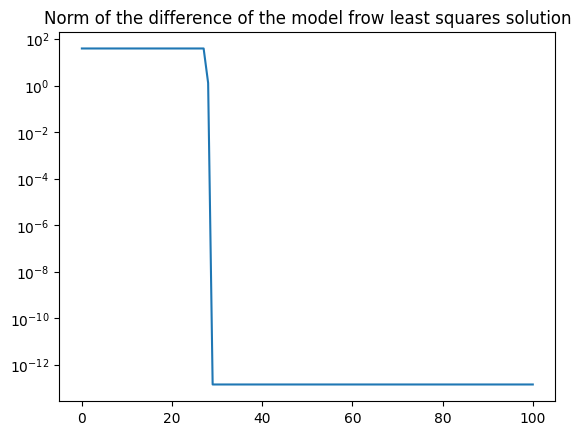

In [4]:
import matplotlib.pyplot as plt
print(test_error)

plt.title("Error VS Best error")
plt.plot(test_error)
plt.plot([best_error for _ in range(len(test_error)) ])
# plt.ylim(0, best_error*2)
plt.show()

plt.title("col variance VS kern variance")
plt.plot(val_col)
# print(val_col)
plt.plot(val_ker)
# print(val_ker)
plt.show()

plt.title("Norm of the difference of the model frow least squares solution")
plt.plot(dif_w_star)
plt.yscale('log')

# print(w_0-w_star)
# print(model.weight_list)



In [5]:

print ("Here are ")
for weight in model.weight_list:
    svd_decomp = np.linalg.svd(weight)
    print(f"highest left singular vectior: {svd_decomp[0].T[0]}")
    print(f"highest singular vaule: {svd_decomp[1][0]}")
    print(f"highest right singular vector: {svd_decomp[2][0]}")
    print()

print (model.get_w_prod())
print(w_star)

Here are 
highest left singular vectior: [-0.06030971  0.99817971]
highest singular vaule: 3.396134040165032
highest right singular vector: [-0.95688886 -0.29045431]

highest left singular vectior: [-0.95688902 -0.29045378]
highest singular vaule: 3.3961493581123103
highest right singular vector: [-0.3787148  -0.92551343]

highest left singular vectior: [0.37870878 0.92551589]
highest singular vaule: 3.3961598568281595
highest right singular vector: [1.]

[[  2.36236475]
 [-39.09925368]]
[[  2.36236475]
 [-39.09925368]]


In [ ]:
y_hat = X W1 W2 ... WL
X.T(y_ha-y) WL.T ... W2.T

SyntaxError: invalid syntax (1134149772.py, line 1)

In [ ]:
def grad_R_1():
    return -(2/n)*X.T(y-X@w_true) 


W = [Wi for i in range(L)]


def f_linear_deep(x, k):
    return 

In [ ]:


class LinearFullyConnectedNoBiasNet(nn.Module):
    def __init__(self, input_size, hidden_layer_size_list, output_size):
        super(LinearFullyConnectedNoBiasNet, self).__init__()
        
        layers = []
        in_size = input_size
        
        # Hidden layers (no bias)
        for hidden_size in hidden_layer_size_list:
            linear = nn.Linear(in_size, hidden_size, bias=False)   # <-- no bias
            init.normal_(linear.weight, mean=0.0, std=0.1)
            layers.append(linear)
            in_size = hidden_size
        
        # Output layer (no bias)
        linear = nn.Linear(in_size, output_size, bias=False)       # <-- no bias
        init.normal_(linear.weight, mean=0.0, std=0.0)
        layers.append(linear)
        
        # Sequential model
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.net(x)



# --- Neural Network ---
class LinearFullyConnectedNet(nn.Module):
    def __init__(self, input_size, hidden_layer_size_list, output_size):
        super(LinearFullyConnectedNet, self).__init__()
        
        # Create a list to hold all layers
        layers = []
        in_size = input_size
        
        for hidden_size in hidden_layer_size_list:
            linear = nn.Linear(in_size, hidden_size)
            init.normal_(linear.weight, mean=0.0, std=0.1)   # <--- weight distribution
            init.zeros_(linear.bias)
            layers.append(linear)
            in_size = hidden_size
        
        linear = nn.Linear(in_size, output_size)
        init.normal_(linear.weight, mean=0.0, std=0.0)       # <--- output layer weights
        init.zeros_(linear.bias)
        layers.append(linear)        
        self.net = nn.Sequential(*layers)
        
        # Wrap layers into a sequential module
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten input
        x = self.net(x)            # Forward pass through linear layers
        return x



def generate_data(n, d, noise_variance):
    """Generates random Gaussian data with noise."""
    X = np.random.normal(0, 1, (n, d))
    Xtest = np.random.normal(0, 1, (n, d))
    w_true = np.random.normal(0, 1, (d,1))
    noise = np.random.normal(0, 1, (n, 1))
    y = X @ w_true + noise_variance * noise
    noise2 = np.random.normal(0, 1, (n,1))
    ytest = Xtest @ w_true + noise_variance * noise2
    w_star = np.linalg.pinv(X.T @ X) @ X.T @ y
    norm_factor = np.linalg.norm(w_star)
    w_star = w_star / norm_factor
    y = y / norm_factor
    ytest = ytest / norm_factor
    return (X, y, Xtest, ytest, w_star)

In [ ]:


# Learning rate Number of steps Number of repetitions
# 0.001 40, 000 100
# 0.004 10, 000 20
# 0.01 4, 000 20

# Assuming your classes FullyConnectedNet, LinearFullyConnectedNet, and generate_data are already defined

loss_list = [0 for _ in range(5)]
for i in range(200):
    # --- Generate data ---
    n_samples = 15
    n_features = 20
    noise_var = 0.1

    X_train, y_train, X_test, y_test, w_star = generate_data(n_samples, n_features, noise_var)

    # Convert to torch tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

    for np_hidden_layer in range(5):
        # --- Hyperparameters ---
        input_size = n_features
        hidden_layers = [n_features for _ in range (np_hidden_layer)]
        output_size = 1
        learning_rate = 0.01
        num_epochs = 4000

        # --- Initialize networks ---
        linear_model = LinearFullyConnectedNoBiasNet(input_size, hidden_layers, output_size)

        # --- Loss and optimizer ---
        criterion = nn.MSELoss()
        linear_optimizer = optim.SGD(linear_model.parameters(), lr=learning_rate)

        # --- Training function ---
        def train(model, optimizer, X, y):
            for epoch in range(num_epochs):
                optimizer.zero_grad()
                outputs = model(X)
                loss = criterion(outputs, y)
                loss.backward()
                optimizer.step()
                # if (epoch + 1) % 50 == 0:
                #     print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item():.6f}")
            return model

        # --- Train Linear Model ---
        print("Training Linear Model:")
        linear_model = train(linear_model, linear_optimizer, X_train_tensor, y_train_tensor)


        # --- Evaluate ---
        def evaluate(model, X, y):
            with torch.no_grad():
                y_pred = model(X)
                mse = criterion(y_pred, y)
            return mse.item()

        linear_mse = evaluate(linear_model, X_test_tensor, y_test_tensor)
        loss_list[np_hidden_layer]+= linear_mse

        print(f"\nTest MSE Linear Model {np_hidden_layer} hidden layers: {linear_mse:.6f}")

print(loss_list)


Training Linear Model:

Test MSE Linear Model 0 hidden layers: 0.523012
Training Linear Model:

Test MSE Linear Model 1 hidden layers: 0.381292
Training Linear Model:

Test MSE Linear Model 2 hidden layers: 0.287648
Training Linear Model:

Test MSE Linear Model 3 hidden layers: 0.362810
Training Linear Model:

Test MSE Linear Model 4 hidden layers: 0.699511
Training Linear Model:

Test MSE Linear Model 0 hidden layers: 0.481280
Training Linear Model:

Test MSE Linear Model 1 hidden layers: 0.447548
Training Linear Model:

Test MSE Linear Model 2 hidden layers: 0.327757
Training Linear Model:

Test MSE Linear Model 3 hidden layers: 0.529418
Training Linear Model:

Test MSE Linear Model 4 hidden layers: 0.482087
Training Linear Model:

Test MSE Linear Model 0 hidden layers: 0.315914
Training Linear Model:

Test MSE Linear Model 1 hidden layers: 0.259519
Training Linear Model:

Test MSE Linear Model 2 hidden layers: 0.290579
Training Linear Model:

Test MSE Linear Model 3 hidden layers: 0

In [ ]:
# [9.702300906181335, 11.642261669039726, 12.057800024747849, 9.821201026439667, 11.0854582041502] -> 5
# [2.9719553887844086, 3.8727946877479553, 2.33234041929245, 3.175804942846298, 3.268315553665161] -> 5 zerowing last layer
# [0.9575713351368904, 1.1555967703461647, 0.9533673599362373, 1.4852095395326614, 0.840996690094471] -> 5 zerowing last layer no bias


# [109.4951546844095, 110.53674245066941, 114.37919862940907, 117.56160471960902, 116.44494522362947] -> 200
# [93.15318554639816, 107.99330313503742, 109.18924476392567, 117.36815650388598, 119.19686833024025] -> 200 zerowing last layer
# [71.90419388189912, 81.10373154655099, 82.87321507930756, 81.21032679080963, 78.89492134004831] -> 200 zerowing last layer no bias
